In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf
from sklearn.decomposition import PCA

import qda

def summary_gaussianity(data_points,titolo=""):
	plt.figure(figsize=(12,4))
	plt.subplot(1, 3, 1)
	stats.probplot(data_points,plot=plt)
	plt.subplot(1, 3, 2)
	plt.hist(data_points)
	plt.subplot(1, 3, 3)
	plt.plot(data_points,'o-')
	plt.suptitle(f"{titolo}")
	plt.show()
	shapiro_stat, shapiro_pvalue = stats.shapiro(data_points)
	print(f"({titolo}) P-value of normality: {shapiro_pvalue} - normality (alpha 5%)? {shapiro_pvalue>0.05}")

# Helper Function
Run this section but dont expand it.\
Anyway it gives the plot_object(pid) function.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf

import os
import re
from scipy import ndimage
import math
import random
import cv2
import skimage
from scipy import stats
import pylab

from PIL import Image, ImageEnhance
from skimage.measure import label, regionprops
from skimage.io import imsave
from sklearn.decomposition import PCA

def img_info_to_part_id(imgname, location):
	imgid = int(re.search(r"img(\d+)\.bmp", imgname).group(1))
	if location == "top_left":
		return (imgid - 1) * 4
	elif location == "bottom_left":
		return (imgid - 1) * 4 + 1
	elif location == "top_right":
		return (imgid - 1) * 4 + 2
	elif location == "bottom_right":
		return (imgid - 1) * 4 + 3
	else:
		raise ValueError("Invalid location: {}".format(location))

# example
# print(img_info_to_part_id("img01.bmp", "top_left"))
# print(img_info_to_part_id("img01.bmp", "bottom_left"))
# print(img_info_to_part_id("img01.bmp", "top_right"))
# print(img_info_to_part_id("img01.bmp", "bottom_right"))
# print()
# print(img_info_to_part_id("img02.bmp", "top_left"))
# print(img_info_to_part_id("img02.bmp", "bottom_left"))
# print(img_info_to_part_id("img02.bmp", "top_right"))
# print(img_info_to_part_id("img02.bmp", "bottom_right"))


def part_id_to_img_info(part_id):
	pid_copy = part_id
	while pid_copy % 4 != 0:
		pid_copy -= 1
	imgnum = pid_copy // 4 +1 
	imgnum = "{:02d}".format(imgnum)

	if part_id % 4 == 0:
		location = "top_left"
	elif part_id % 4 == 1:
		location = "bottom_left"
	elif part_id % 4 == 2:
		location = "top_right"
	elif part_id % 4 == 3:
		location = "bottom_right"
	else:
		raise ValueError("Invalid part ID: {}".format(part_id))

	return imgnum, location

# example
# print(part_id_to_img_info(0))
# print(part_id_to_img_info(1))
# print(part_id_to_img_info(2))
# print(part_id_to_img_info(3))
# print()
# print(part_id_to_img_info(4))
# print(part_id_to_img_info(5))
# print(part_id_to_img_info(6))
# print(part_id_to_img_info(7))

cartella_immagini = {
	'originals': '../Processed dataset/df/',
	'rot&crop': '../Processed dataset/df new/',
	# Altre associazioni possibili
}

def genera_percorso_immagine(part_id, which_ones="originals",option="seg"):	
	imgnum, location = part_id_to_img_info(part_id)
	real_option = option
	if option=="seg":
		real_option = "segmented"
	else:
		real_option = "labeled"

	nome_immagine = f"img{imgnum}.bmp_{location}_{real_option}.png"
	return os.path.join(cartella_immagini[which_ones], nome_immagine)

# Utilizzo della funzione
# print(genera_percorso_immagine(0, "originals"))
# print(genera_percorso_immagine(1, "originals"))
# print(genera_percorso_immagine(2, "originals"))
# print(genera_percorso_immagine(3, "originals"))

# Loading a CSV file into a DataFrame
df = pd.read_csv('../Processed dataset/df.csv')
df_voids = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')

df_new = pd.read_csv('../Processed dataset/df_new.csv')
df_new_voids = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_new_parts = pd.read_csv('../Processed dataset/df_new_parts.csv')

def plot_object(part_id):
	plt.figure(figsize=(8, 10))

	plt.subplot(1, 2, 1)
	# plt.subplot(1, 2, 2)
	# plt.subplot(1, 4, 2)
	img_new = plt.imread(genera_percorso_immagine(part_id, "rot&crop","lab"))
	height, width = img_new.shape[:2]
	zoom_factor = 0.8 
	zoomed_width = width * zoom_factor
	zoomed_height = height * zoom_factor
	x_center = width // 2
	y_center = height // 2
	x1 = max(0, x_center - zoomed_width // 2)
	x2 = min(width, x_center + zoomed_width // 2)
	y1 = max(0, y_center - zoomed_height // 2)
	y2 = min(height, y_center + zoomed_height // 2)
	plt.imshow(img_new, cmap="gray")
	plt.axis('off')
	plt.xlim(x1, x2)
	plt.ylim(y2, y1)
	plt.title(f"img new (part_id {part_id}, nvoids={df_new_parts.iloc[part_id]['Num_voids']})")

	plt.subplot(1, 2, 2)
	# plt.subplot(1, 4, 4)
	img_new = plt.imread(genera_percorso_immagine(part_id, "rot&crop","seg"))
	print(img_new.shape[0],"rows -",img_new.shape[1],"cols")

	plt.imshow(img_new,cmap="gray")
	plt.title(f"img new (part_id {part_id}, nvoids={df_new_parts.iloc[part_id]['Num_voids']})")
	plt.axis("off")

	plt.tight_layout()
	plt.show()

### Example

226 rows - 226 cols


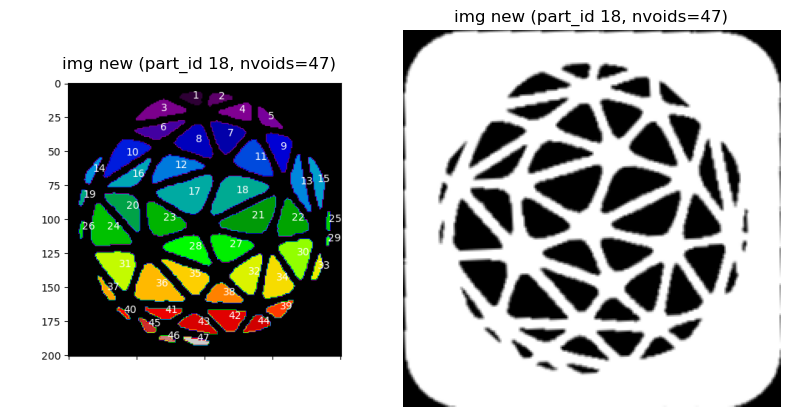

In [3]:
plot_object(18)

In [2]:
# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_parts_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio,Curvature Mean
0,img01.bmp,top_left,part,0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,0,41,38291,13692,0.736606,0.006382
1,img01.bmp,bottom_left,part,0,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,1,42,37887,14096,0.728834,0.006624
2,img01.bmp,top_right,part,0,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,2,46,37334,14194,0.724538,0.006660
3,img01.bmp,bottom_right,part,0,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,3,45,37868,13661,0.734887,0.005039
4,img02.bmp,top_left,part,0,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,4,41,36599,15385,0.704044,0.006398
5,img02.bmp,bottom_left,part,0,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,5,42,36382,15602,0.699869,0.006654
6,img02.bmp,top_right,part,0,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,6,47,36808,14721,0.714316,0.005715
7,img02.bmp,bottom_right,part,0,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,7,43,36903,15081,0.709892,0.005634
8,img03.bmp,top_left,part,0,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,8,43,37697,14059,0.728360,0.005471
9,img03.bmp,bottom_left,part,0,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,9,43,37626,14130,0.726988,0.006325


In [3]:
# Drop unused columns 
# Vd "Gaussian part dataset.ipynb" for details
data_part_norm = df_parts_new.drop(columns=['Orientation [radians]','Num_voids','Num_Wpixels','Solidity','Extent' ,'Num_Bpixels', 'ID','Equivalent Diameter [pixels]']) 

In [4]:
dataNum = data_part_norm.select_dtypes(include=np.number)
dataset=dataNum.drop(columns=['Part_ID']) 
dataset.head(10)

,Area [pixels],Perimeter [pixels],Eccentricity,Major Axis Length [pixels],Minor Axis Length [pixels],Wpixels_ratio,Curvature Mean
0,38291,4105.674,0.153,277.925,274.667,0.736606,0.006382
1,37887,4155.306,0.157,279.026,275.584,0.728834,0.006624
2,37334,4106.076,0.189,277.777,272.791,0.724538,0.006660
3,37868,4139.319,0.164,277.900,274.158,0.734887,0.005039
4,36599,4223.005,0.118,280.140,278.182,0.704044,0.006398
5,36382,4305.088,0.104,280.715,279.187,0.699869,0.006654
6,36808,4366.544,0.067,278.233,277.617,0.714316,0.005715
7,36903,4180.034,0.127,279.169,276.892,0.709892,0.005634
8,37697,4124.720,0.123,277.368,275.259,0.728360,0.005471
9,37626,4153.833,0.117,277.820,275.897,0.726988,0.006325


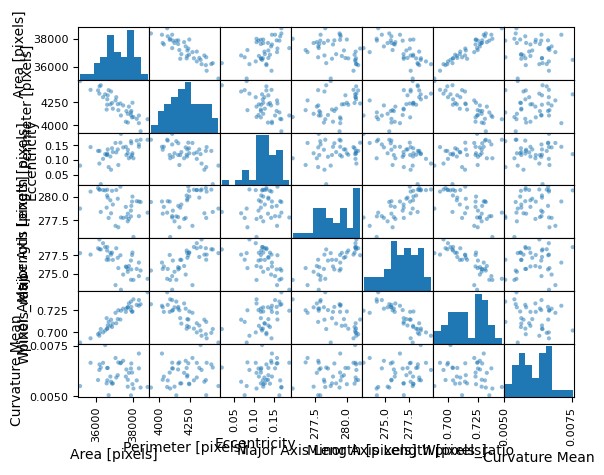

In [5]:
#Scatter plot
pd.plotting.scatter_matrix(dataset)
plt.show()

# can see some linear correlated vars and some very sparse/uncorrelated

## Control charts

In [8]:
# No need to check normality assumption again because already required in variable selection

### Minor axis length

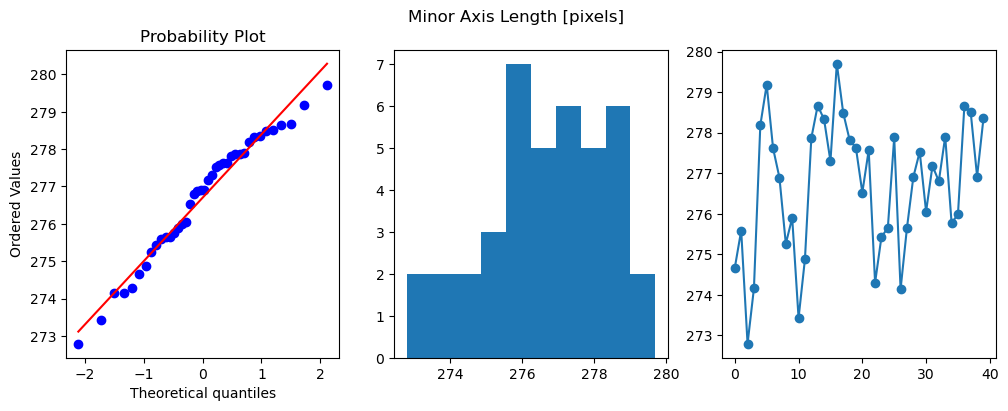

(Minor Axis Length [pixels]) P-value of normality: 0.31714728474617004 - normality (alpha 5%)? True


In [85]:
data=pd.DataFrame(dataset['Minor Axis Length [pixels]'])
summary_gaussianity(dataset['Minor Axis Length [pixels]'],'Minor Axis Length [pixels]')

In [86]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.032


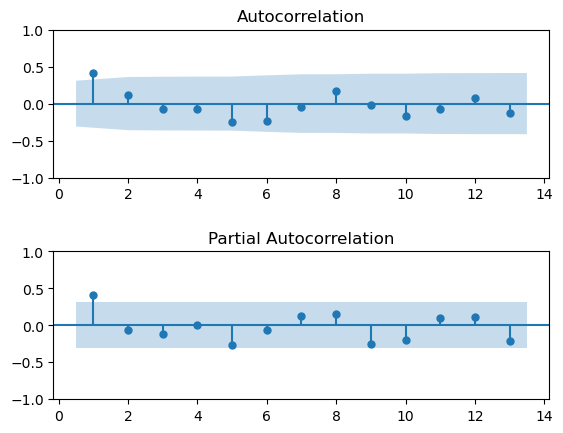

In [87]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

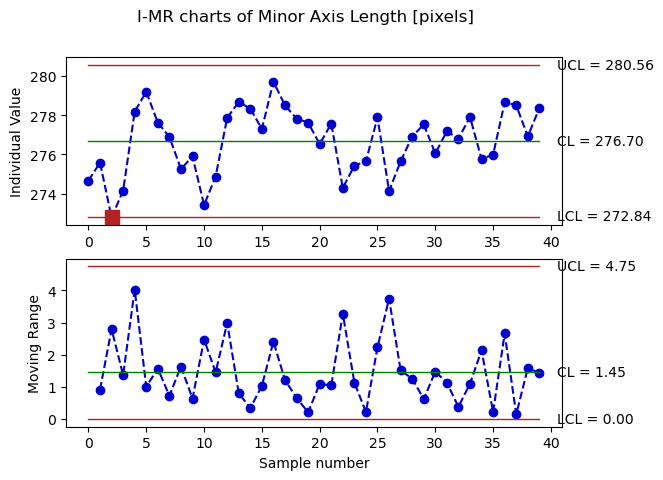

In [88]:
data_IMR = qda.ControlCharts.IMR(data,'Minor Axis Length [pixels]')

In [13]:
#just one seems to be out of control on individual value, but don't have assignable cause
#also not getting that out -> probably better to keep it

In [ ]:
# provando a togliere autocorrelazione con lag=1
#k=1
#data['lag1'] = data.shift(k)
#data['diff1'] = data['Minor Axis Length [pixels]'] - data['lag1']
#_, pval_runs = runstest_1samp(data['diff1'].dropna(), correction=False)
#print('Runs test p-value = {:.3f}'.format(pval_runs))

#data_IMR = qda.ControlCharts.IMR(data,'diff1')

In [89]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(data['Minor Axis Length [pixels]']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.head()

,0,1,2,3
0,274.667,275.584,272.791,274.158
1,278.182,279.187,277.617,276.892
2,275.259,275.897,273.424,274.877
3,277.867,278.671,278.330,277.296
4,279.703,278.492,277.828,277.621


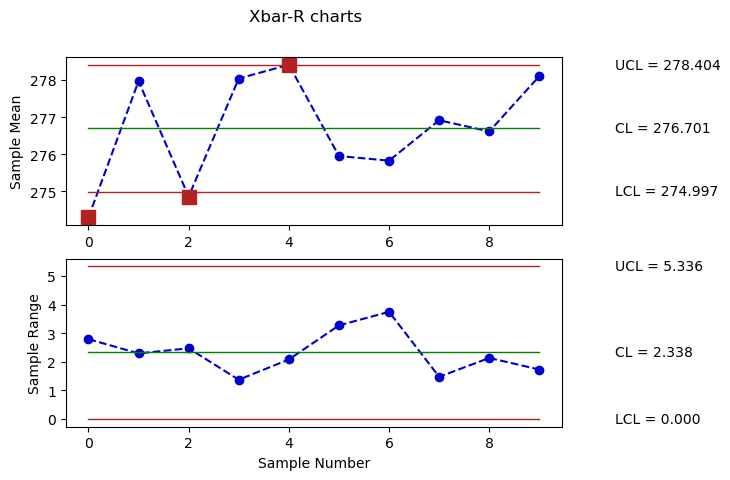

In [91]:
data_XR = qda.ControlCharts.XbarR(data_tray)

In [ ]:
#independence problem
# Better to try with I-MR-R

In [92]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])
data_Xbar.head()

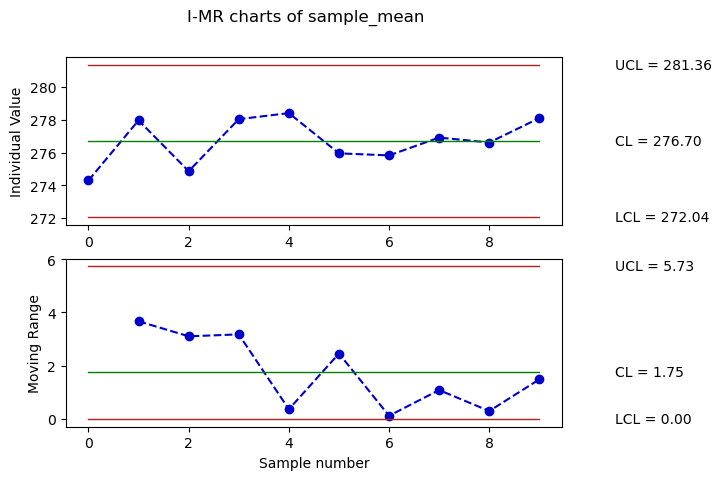

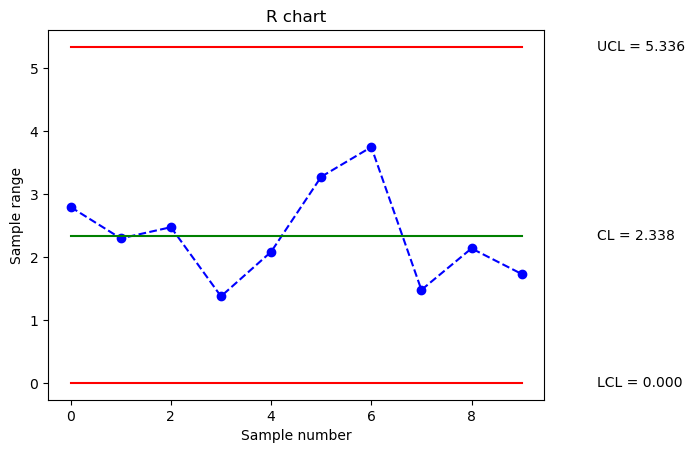

In [94]:
# I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


### Wpixels_ratio

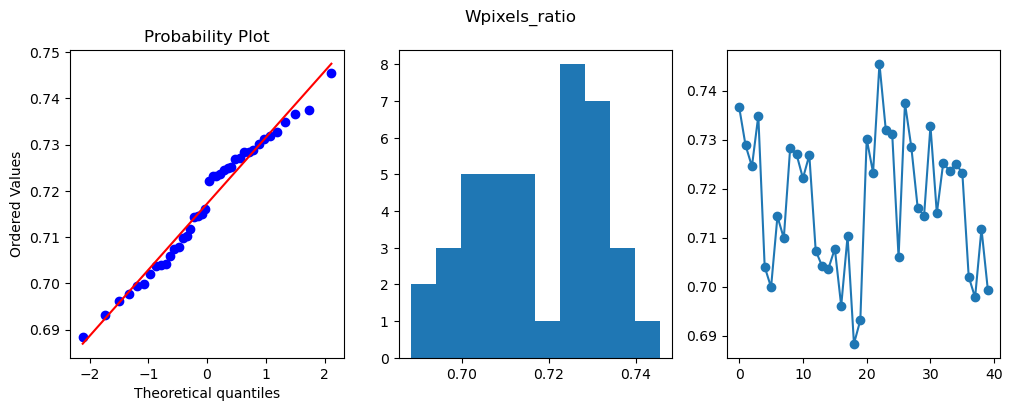

(Wpixels_ratio) P-value of normality: 0.350693941116333 - normality (alpha 5%)? True


In [95]:
data=pd.DataFrame(dataset['Wpixels_ratio'])
summary_gaussianity(dataset['Wpixels_ratio'],'Wpixels_ratio')

In [96]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.004


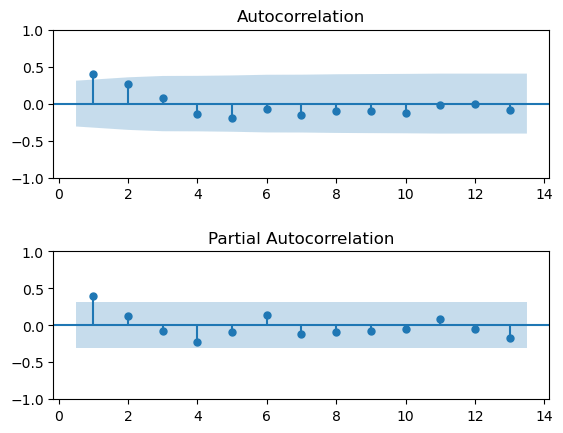

In [97]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

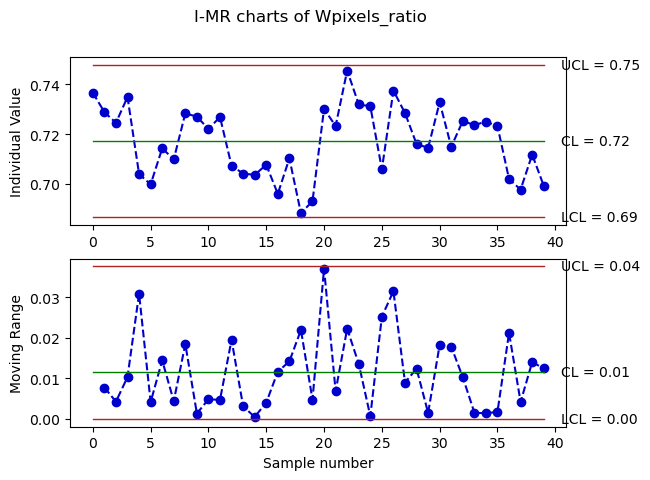

In [98]:
data_IMR = qda.ControlCharts.IMR(data,'Wpixels_ratio')

In [20]:
#everything looks in control  --> Area gives pb with image 18 for example, we use w pixels

In [18]:
# provando a togliere autocorrelazione con lag=1
#k=1
#data['lag1'] = data.shift(k)
#data['diff1'] = data['Wpixels_ratio'] - data['lag1']
#_, pval_runs = runstest_1samp(data['diff1'].dropna(), correction=False)
#print('Runs test p-value = {:.3f}'.format(pval_runs))
#still not uncorr? 

Runs test p-value = 0.002


In [99]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(data['Wpixels_ratio']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.head()

,0,1,2,3
0,0.736606,0.728834,0.724538,0.734887
1,0.704044,0.699869,0.714316,0.709892
2,0.728360,0.726988,0.722116,0.726853
3,0.707352,0.704197,0.703681,0.707744
4,0.696080,0.710277,0.688347,0.693138


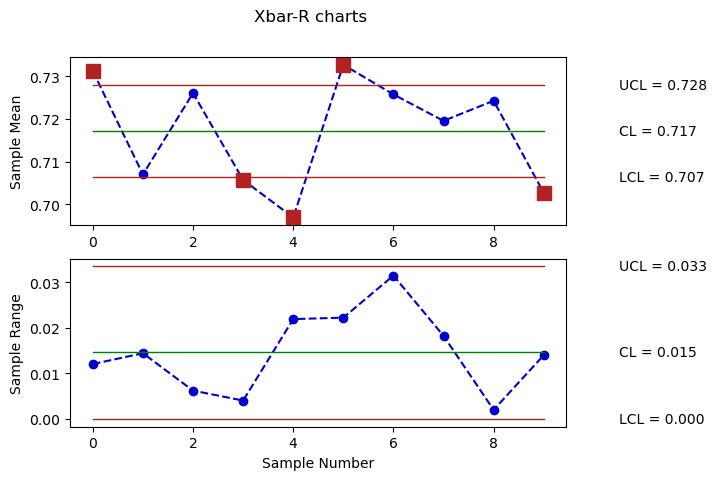

In [100]:
data_XR = qda.ControlCharts.XbarR(data_tray)

In [ ]:
#very bad -> dependence problem

In [101]:
# Create a new dataframe that stores the mean of all the samples
data_Xbar = pd.DataFrame(data_XR['sample_mean'])
data_Xbar.head()

,sample_mean
0,0.731216
1,0.707030
2,0.726079
3,0.705744
4,0.696960


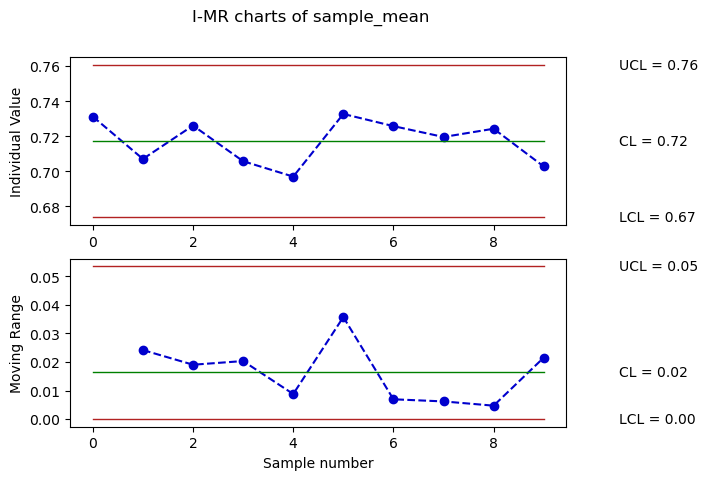

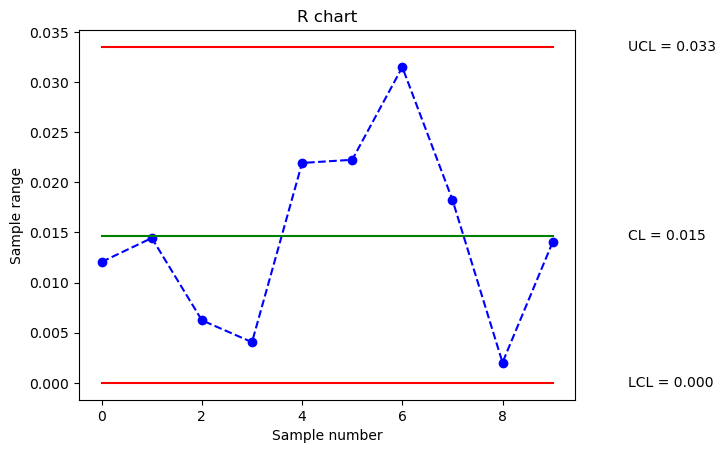

In [102]:
# I-MR-R control chart

# Build the IMR chart using this new dataframe
data_Xbar = qda.ControlCharts.IMR(data_Xbar, 'sample_mean')

# Plot the R chart as well
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


### Area

In [ ]:
dataset[["Area [pixels]","Wpixels_ratio"]]

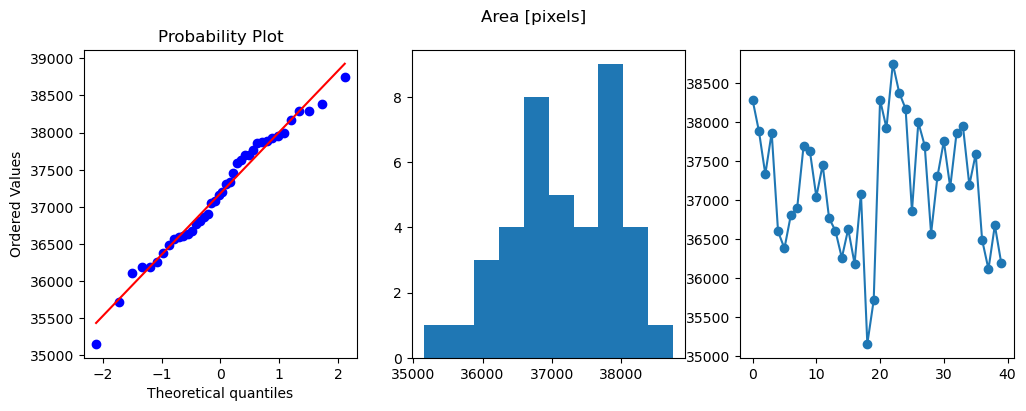

(Area [pixels]) P-value of normality: 0.7310476303100586 - normality (alpha 5%)? True


In [22]:
data=pd.DataFrame(dataset['Area [pixels]'])
summary_gaussianity(dataset['Area [pixels]'],titolo="Area [pixels]")

In [23]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.025


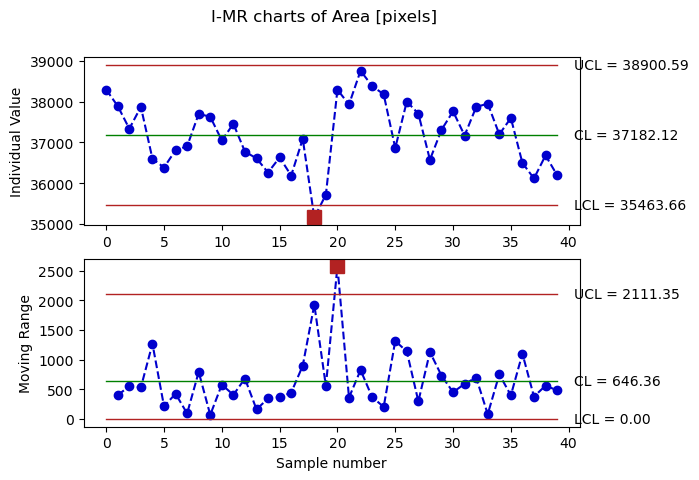

In [24]:
data_IMR = qda.ControlCharts.IMR(data,'Area [pixels]')

In [25]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [18]


### Biggest void perimeter

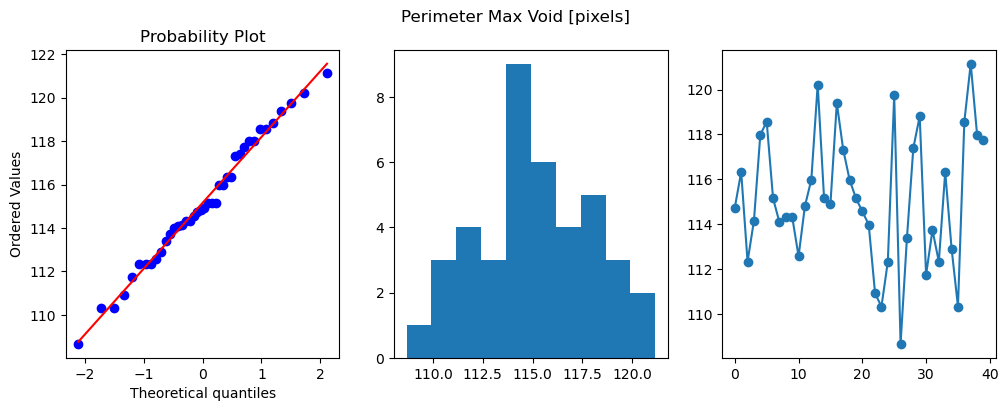

(Perimeter Max Void [pixels]) P-value of normality: 0.9064947962760925 - normality (alpha 5%)? True


In [26]:
biggest_void_perimeter = np.zeros(40)
for pid in range(0,40):
	img_df = df_void_new.loc[df_void_new['Part_ID'] == pid]
	biggest_void_perimeter[pid] = np.max(img_df["Perimeter [pixels]"])
	# print(f'biggest void for {pid} was at index {np.argmax(img_df["Area [pixels]"])+1}')

data = pd.DataFrame(biggest_void_perimeter, columns=['Perimeter Max Void [pixels]'])
summary_gaussianity(biggest_void_perimeter,'Perimeter Max Void [pixels]')

In [27]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.161


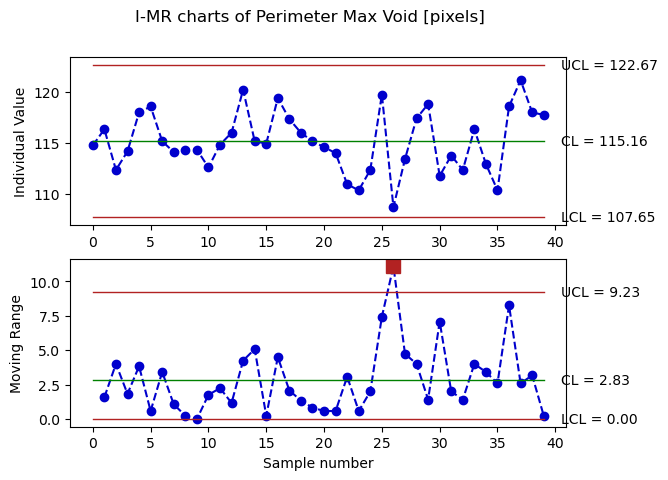

In [28]:
data_IMR = qda.ControlCharts.IMR(data,'Perimeter Max Void [pixels]')

### Biggest void area

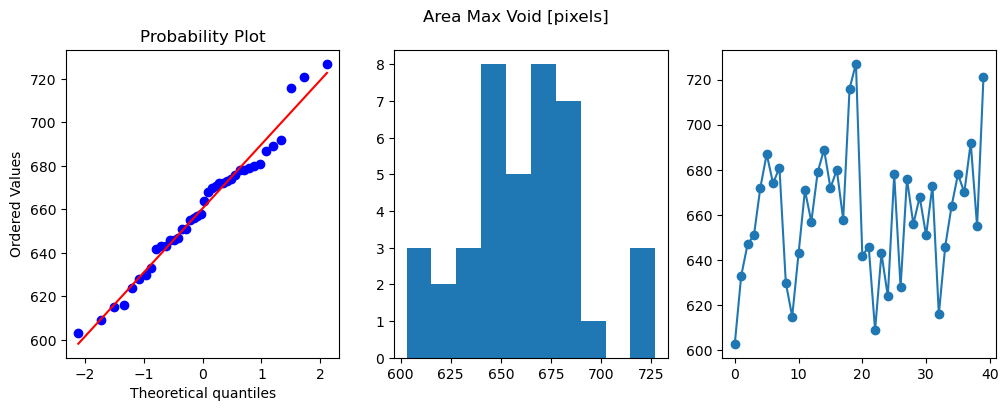

(Area Max Void [pixels]) P-value of normality: 0.5666319727897644 - normality (alpha 5%)? True


In [29]:
biggest_void_areas = np.zeros(40)
for pid in range(0,40):
	img_df = df_void_new.loc[df_void_new['Part_ID'] == pid]
	biggest_void_areas[pid] = np.max(img_df["Area [pixels]"])
	# print(f'biggest void for {pid} was at index {np.argmax(img_df["Area [pixels]"])+1}')

data = pd.DataFrame(biggest_void_areas, columns=['Area Max Void [pixels]'])
summary_gaussianity(biggest_void_areas,'Area Max Void [pixels]')

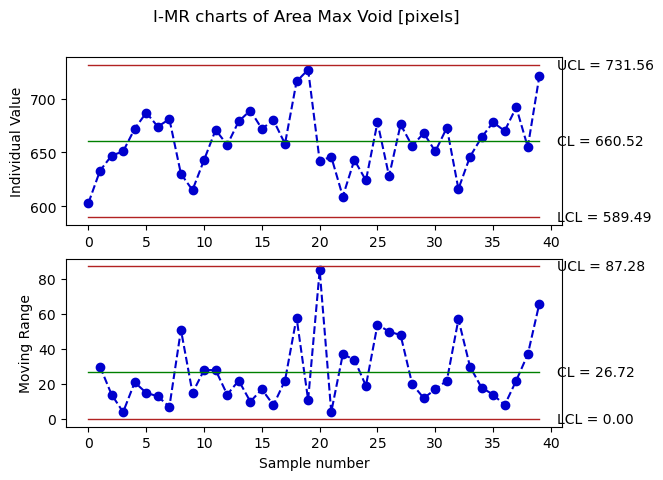

In [30]:
data_IMR = qda.ControlCharts.IMR(data,'Area Max Void [pixels]')

### Major Axis 

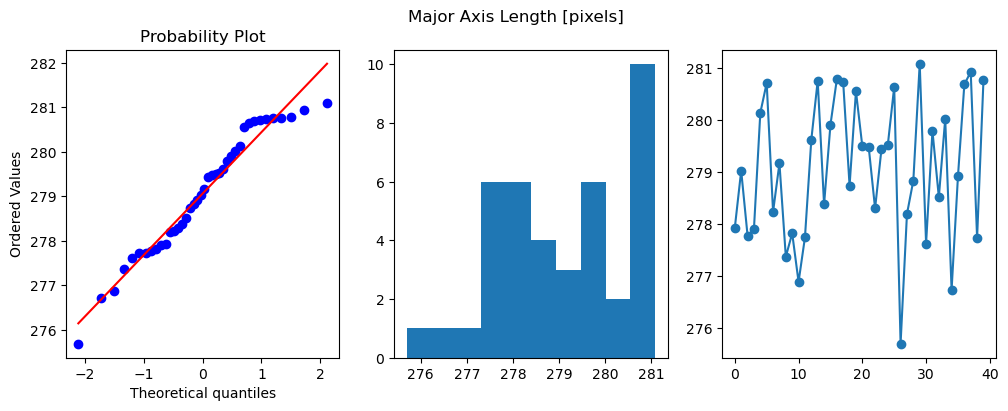

(Major Axis Length [pixels]) P-value of normality: 0.09676539897918701 - normality (alpha 5%)? True


In [103]:
data=pd.DataFrame(dataset['Major Axis Length [pixels]'])
summary_gaussianity(dataset['Major Axis Length [pixels]'],'Major Axis Length [pixels]')

In [104]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.749


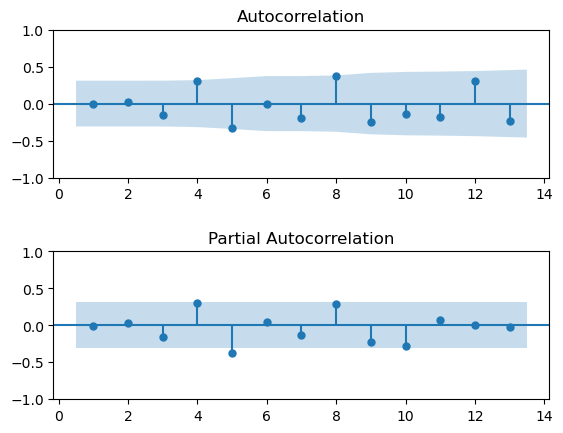

In [33]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

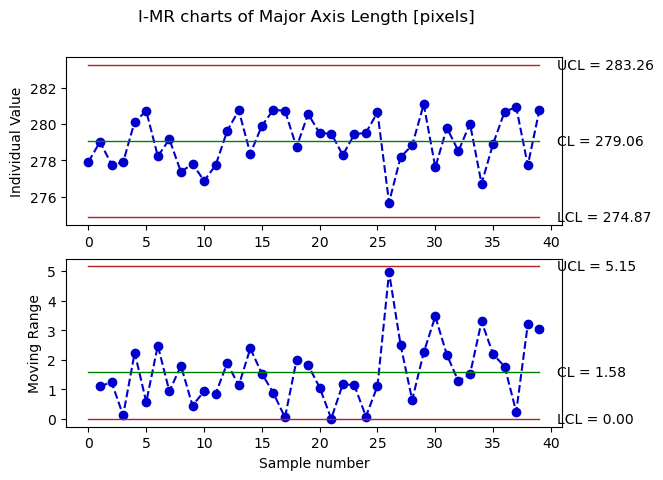

In [34]:
data_IMR = qda.ControlCharts.IMR(data,'Major Axis Length [pixels]')

In [10]:
### no visible defects

In [35]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(data['Major Axis Length [pixels]']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.head()

,0,1,2,3
0,277.925,279.026,277.777,277.900
1,280.140,280.715,278.233,279.169
2,277.368,277.820,276.883,277.739
3,279.623,280.759,278.375,279.910
4,280.785,280.728,278.735,280.557


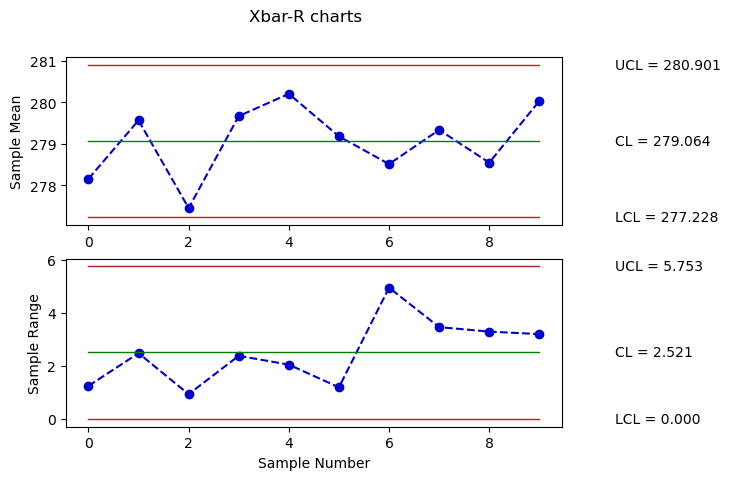

In [36]:
data_XR = qda.ControlCharts.XbarR(data_tray)

### Eccentricity

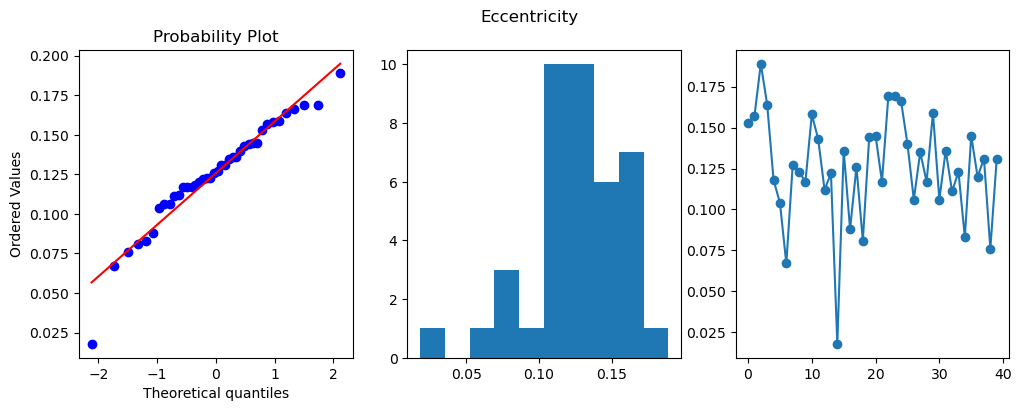

(Eccentricity) P-value of normality: 0.09720978140830994 - normality (alpha 5%)? True


In [37]:
data=pd.DataFrame(dataset['Eccentricity'])
summary_gaussianity(dataset['Eccentricity'],'Eccentricity')

In [38]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test p-value = 0.193


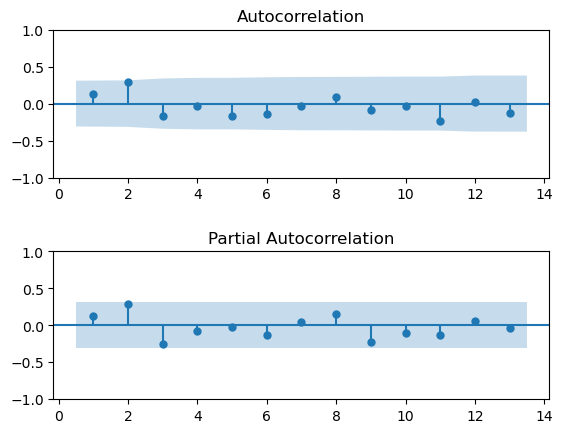

In [39]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

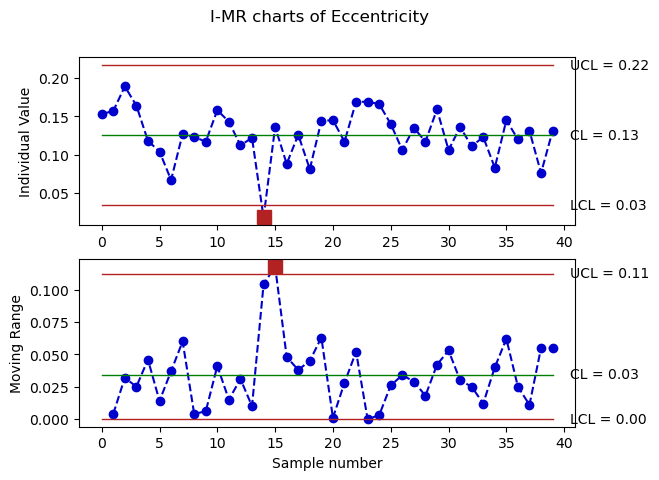

In [40]:
data_IMR = qda.ControlCharts.IMR(data,'Eccentricity')

In [41]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [14]


227 rows - 227 cols


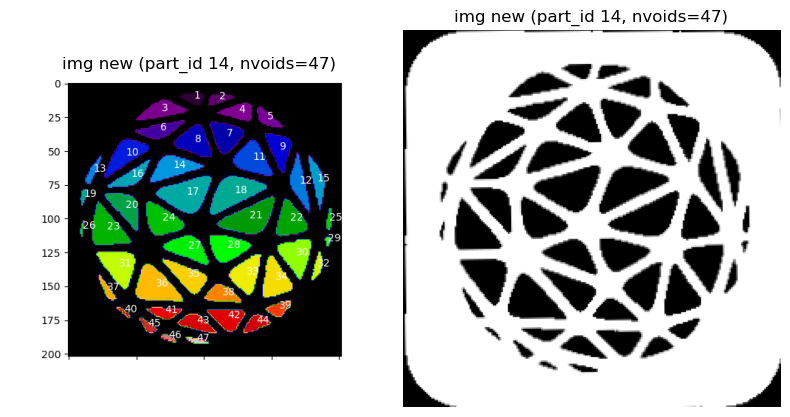

In [17]:
plot_object(14) 

In [42]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(data['Eccentricity']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.head()

,0,1,2,3
0,0.153,0.157,0.189,0.164
1,0.118,0.104,0.067,0.127
2,0.123,0.117,0.158,0.143
3,0.112,0.122,0.018,0.136
4,0.088,0.126,0.081,0.144


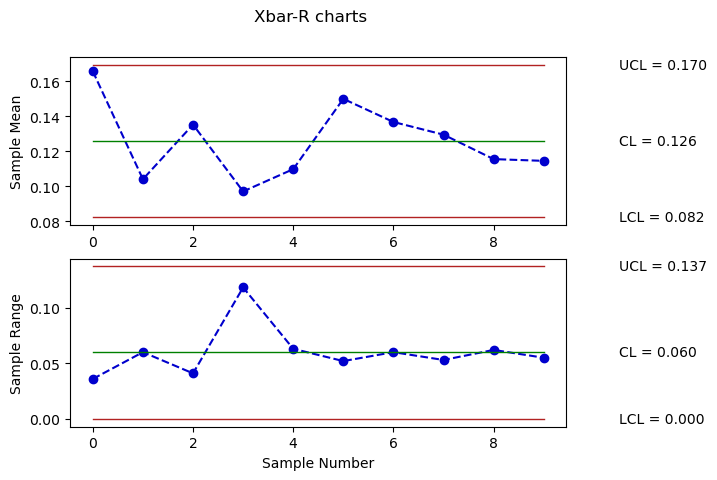

In [43]:
data_XR = qda.ControlCharts.XbarR(data_tray)

### Perimeter

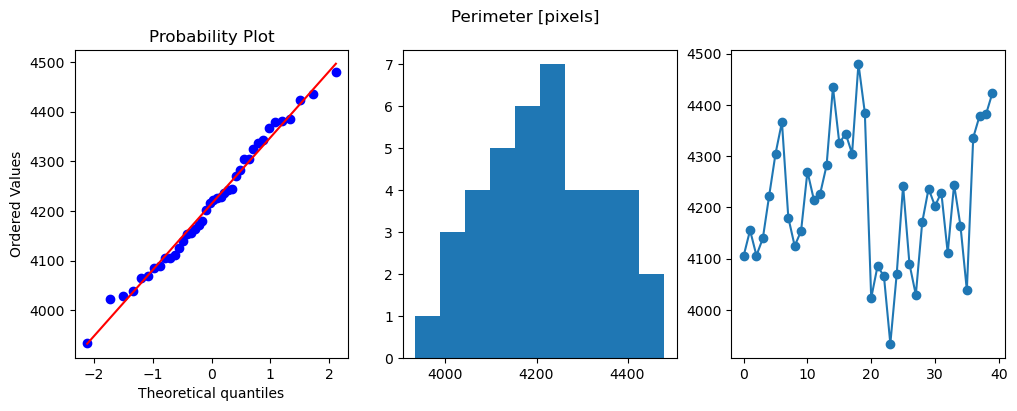

(Perimeter [pixels]) P-value of normality: 0.8690754771232605 - normality (alpha 5%)? True


In [44]:

data=pd.DataFrame(dataset['Perimeter [pixels]'])
summary_gaussianity(dataset['Perimeter [pixels]'],titolo="Perimeter [pixels]")


In [45]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.026


In [43]:
# no indipendece

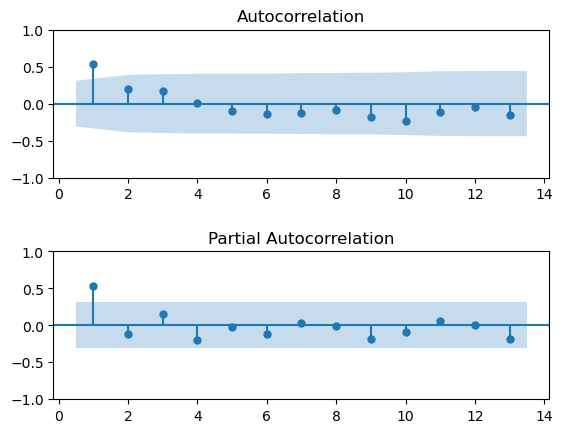

In [46]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

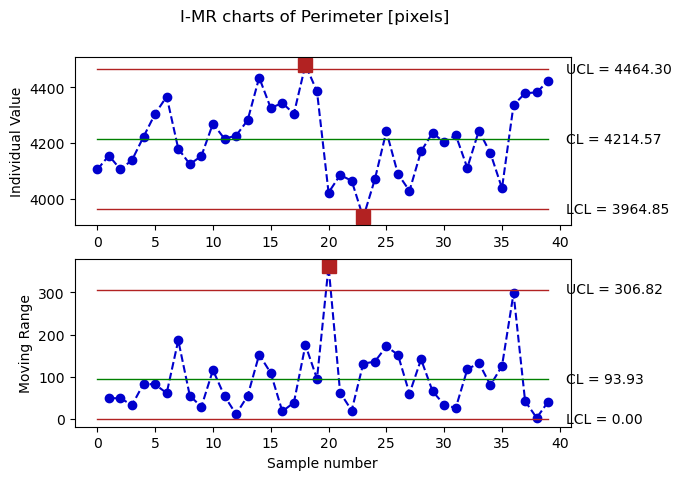

In [47]:
data_IMR = qda.ControlCharts.IMR(data,'Perimeter [pixels]')

In [48]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [18 23]


226 rows - 226 cols


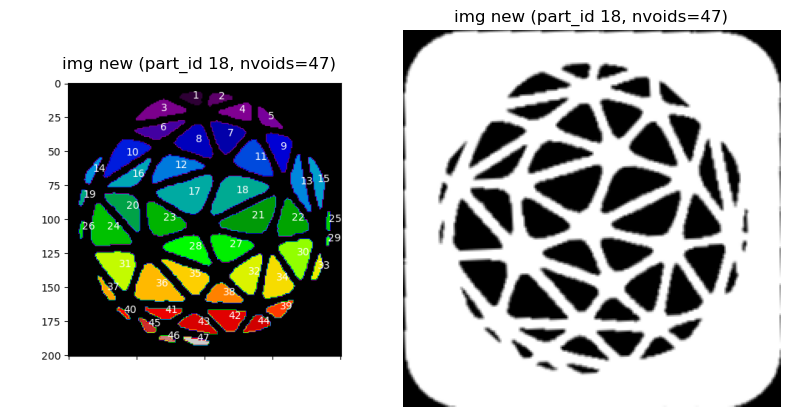

In [47]:
plot_object(18) 

In [49]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(data['Perimeter [pixels]']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.head()

,0,1,2,3
0,4105.674,4155.306,4106.076,4139.319
1,4223.005,4305.088,4366.544,4180.034
2,4124.720,4153.833,4269.906,4215.355
3,4226.898,4281.740,4434.485,4325.414
4,4343.774,4304.899,4480.325,4384.828


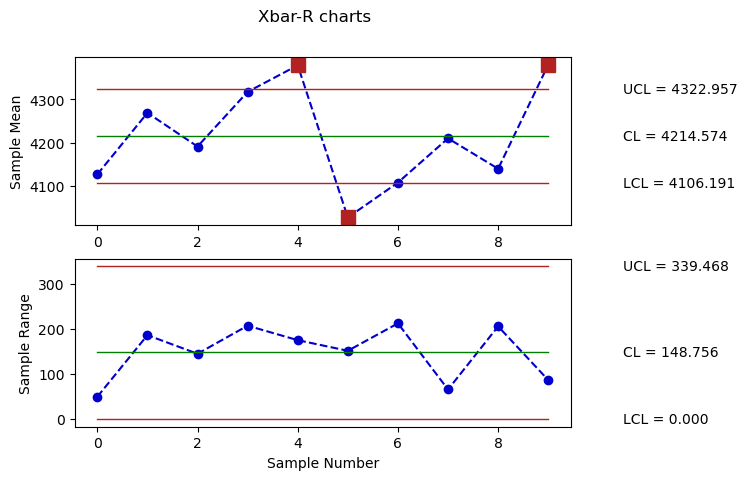

In [50]:
data_XR = qda.ControlCharts.XbarR(data_tray)

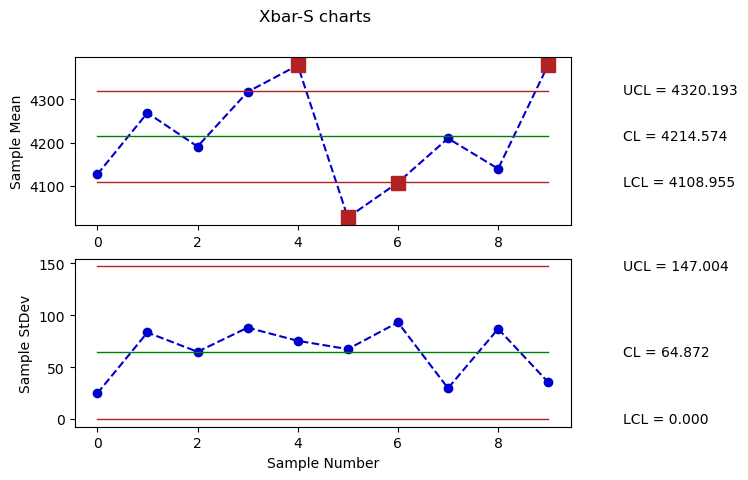

In [51]:
data_XR = qda.ControlCharts.XbarS(data_tray)

### Curvature Mean

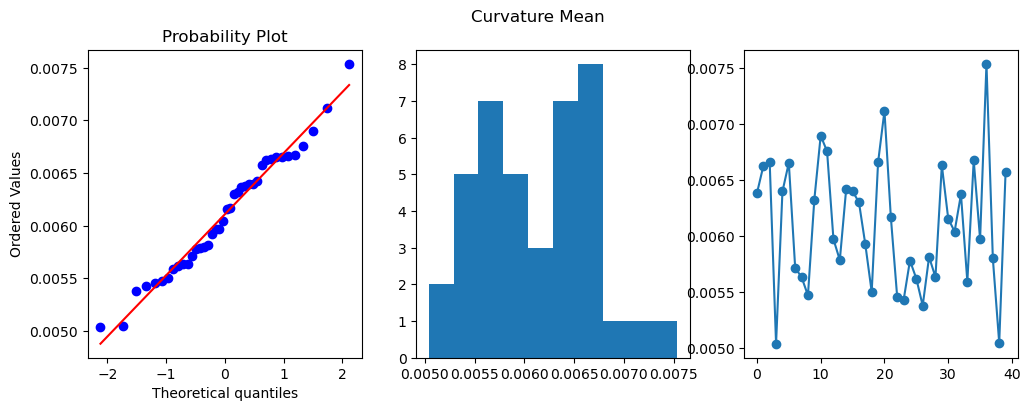

(Curvature Mean) P-value of normality: 0.5501565337181091 - normality (alpha 5%)? True


In [52]:
data=pd.DataFrame(dataset['Curvature Mean'])
summary_gaussianity(dataset['Curvature Mean'],titolo="Curvature Mean")


In [53]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.522


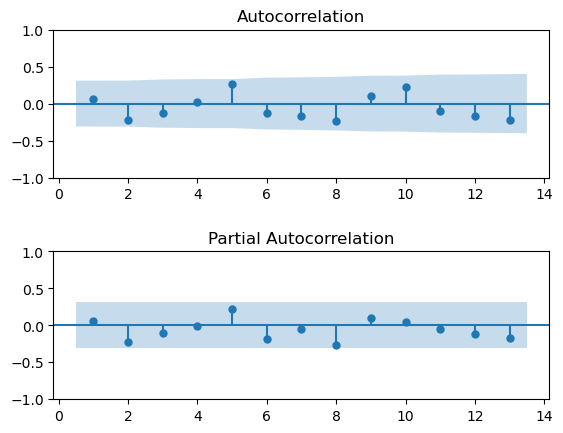

In [54]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

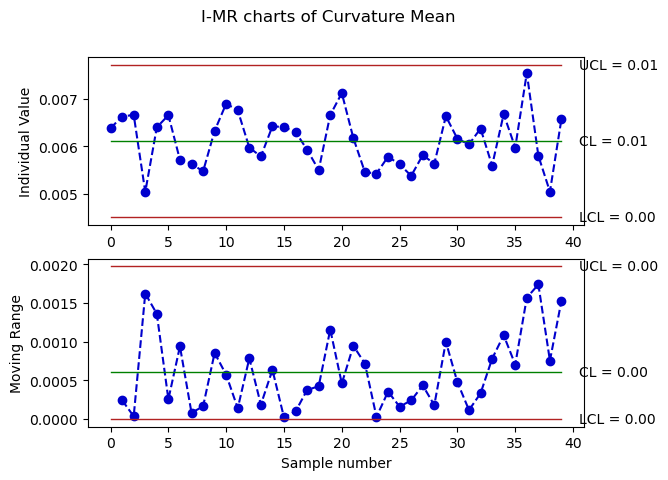

In [55]:
data_IMR = qda.ControlCharts.IMR(data,'Curvature Mean')

In [56]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: []


In [57]:
m=10   #number of trays
n=4    #elements per tray
data_tray=np.array(data['Curvature Mean']).reshape(m,n)
data_tray=pd.DataFrame(data_tray)
data_tray.head()

,0,1,2,3
0,0.006382,0.006624,0.006660,0.005039
1,0.006398,0.006654,0.005715,0.005634
2,0.005471,0.006325,0.006896,0.006756
3,0.005972,0.005786,0.006421,0.006401
4,0.006302,0.005926,0.005502,0.006657


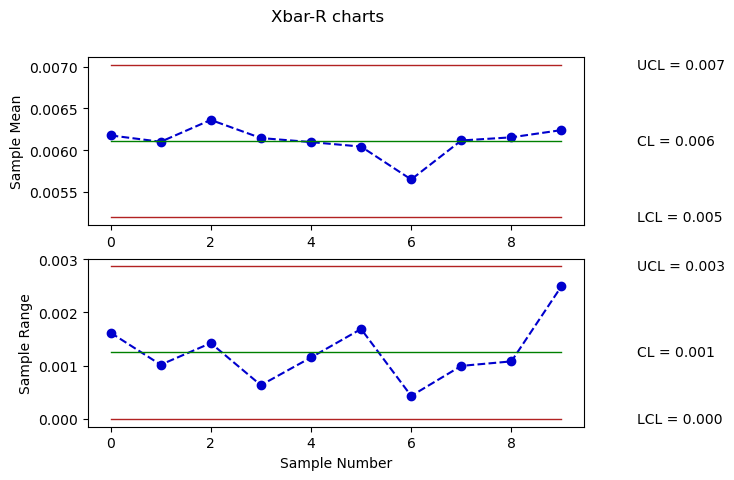

In [58]:
data_XR = qda.ControlCharts.XbarR(data_tray)

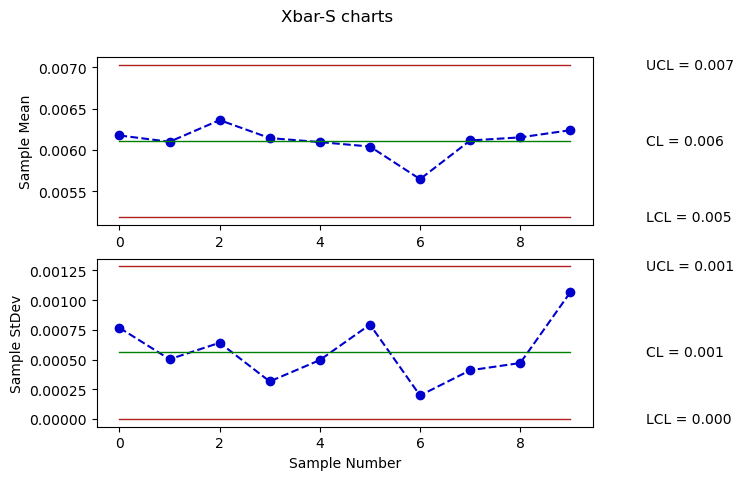

In [59]:
data_XR = qda.ControlCharts.XbarS(data_tray)